# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

# Wednesday Netflix Series Episode wise Analysis

## Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('./wednesday_data/dtm.pkl')
data = data.transpose()
data.head()

,E01,E02,E03,E04,E05,E06,E07,E08
abandoned,2,1,1,1,2,1,1,1
abilities,0,0,1,0,1,0,0,0
ability,0,1,1,1,1,2,0,1
ablaze,0,0,1,0,0,0,0,0
able,0,1,2,1,0,1,1,1


In [2]:
# Find the top 30 words said in each episode
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'E01': [('wednesday', 42),
  ('music', 34),
  ('playing', 26),
  ('don', 25),
  ('nevermore', 24),
  ('school', 20),
  ('know', 20),
  ('ve', 19),
  ('like', 17),
  ('did', 15),
  ('rowan', 14),
  ('way', 14),
  ('just', 14),
  ('mother', 13),
  ('going', 13),
  ('want', 13),
  ('people', 12),
  ('thing', 12),
  ('right', 12),
  ('need', 12),
  ('oh', 12),
  ('got', 11),
  ('little', 11),
  ('time', 11),
  ('tell', 11),
  ('love', 10),
  ('ll', 10),
  ('girl', 10),
  ('enid', 9),
  ('gonna', 9)],
 'E02': [('wednesday', 31),
  ('music', 25),
  ('rowan', 23),
  ('like', 22),
  ('don', 19),
  ('plays', 19),
  ('know', 17),
  ('just', 16),
  ('ve', 15),
  ('thing', 14),
  ('enid', 14),
  ('come', 13),
  ('let', 13),
  ('want', 11),
  ('cup', 11),
  ('bianca', 11),
  ('poe', 11),
  ('nevermore', 10),
  ('ll', 10),
  ('weems', 10),
  ('think', 10),
  ('scales', 10),
  ('need', 10),
  ('sighs', 9),
  ('xavier', 9),
  ('good', 9),
  ('people', 8),
  ('right', 8),
  ('sheriff', 8),
  ('tell', 

In [3]:
# Print the top 15 words said in each episode
for episode, top_words in top_dict.items():
    print(episode)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

E01
wednesday, music, playing, don, nevermore, school, know, ve, like, did, rowan, way, just, mother
---
E02
wednesday, music, rowan, like, don, plays, know, just, ve, thing, enid, come, let, want
---
E03
music, playing, know, crackstone, don, like, wednesday, just, want, monster, yeah, hey, rowan, town
---
E04
playing, music, wednesday, like, don, come, eugene, dance, know, just, ll, going, goo, monster
---
E05
music, wednesday, playing, garrett, father, don, know, did, ve, gates, right, mother, morticia, come
---
E06
music, playing, know, enid, wednesday, like, just, don, want, birthday, oh, tyler, gates, right
---
E07
music, playing, wednesday, know, fester, hyde, just, ve, ll, don, like, right, kinbott, monster
---
E08
wednesday, music, tyler, playing, weems, ve, know, laurel, don, thing, hyde, xavier, just, crackstone
---


**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [5]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each episode
words = []
for episode in data.columns:
    top = [word for (word, count) in top_dict[episode]]
    for t in top:
        words.append(t)
        
words

['wednesday',
 'music',
 'playing',
 'don',
 'nevermore',
 'school',
 'know',
 've',
 'like',
 'did',
 'rowan',
 'way',
 'just',
 'mother',
 'going',
 'want',
 'people',
 'thing',
 'right',
 'need',
 'oh',
 'got',
 'little',
 'time',
 'tell',
 'love',
 'll',
 'girl',
 'enid',
 'gonna',
 'wednesday',
 'music',
 'rowan',
 'like',
 'don',
 'plays',
 'know',
 'just',
 've',
 'thing',
 'enid',
 'come',
 'let',
 'want',
 'cup',
 'bianca',
 'poe',
 'nevermore',
 'll',
 'weems',
 'think',
 'scales',
 'need',
 'sighs',
 'xavier',
 'good',
 'people',
 'right',
 'sheriff',
 'tell',
 'music',
 'playing',
 'know',
 'crackstone',
 'don',
 'like',
 'wednesday',
 'just',
 'want',
 'monster',
 'yeah',
 'hey',
 'rowan',
 'town',
 'pilgrim',
 'joseph',
 'jericho',
 'house',
 'right',
 'meeting',
 'think',
 'thing',
 'old',
 'come',
 'nevermore',
 'girl',
 'weems',
 'oh',
 'world',
 'believe',
 'playing',
 'music',
 'wednesday',
 'like',
 'don',
 'come',
 'eugene',
 'dance',
 'know',
 'just',
 'll',
 'goi

In [6]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('wednesday', 8),
 ('music', 8),
 ('don', 8),
 ('know', 8),
 ('just', 8),
 ('playing', 7),
 ('ve', 7),
 ('like', 7),
 ('thing', 7),
 ('right', 7),
 ('ll', 7),
 ('nevermore', 6),
 ('want', 6),
 ('come', 6),
 ('did', 5),
 ('need', 5),
 ('enid', 5),
 ('let', 5),
 ('didn', 5),
 ('going', 4),
 ('oh', 4),
 ('got', 4),
 ('time', 4),
 ('weems', 4),
 ('think', 4),
 ('xavier', 4),
 ('monster', 4),
 ('rowan', 3),
 ('yeah', 3),
 ('okay', 3),
 ('gates', 3),
 ('tyler', 3),
 ('school', 2),
 ('way', 2),
 ('mother', 2),
 ('people', 2),
 ('tell', 2),
 ('girl', 2),
 ('sheriff', 2),
 ('crackstone', 2),
 ('old', 2),
 ('eugene', 2),
 ('family', 2),
 ('hyde', 2),
 ('laurel', 2),
 ('little', 1),
 ('love', 1),
 ('gonna', 1),
 ('plays', 1),
 ('cup', 1),
 ('bianca', 1),
 ('poe', 1),
 ('scales', 1),
 ('sighs', 1),
 ('good', 1),
 ('hey', 1),
 ('town', 1),
 ('pilgrim', 1),
 ('joseph', 1),
 ('jericho', 1),
 ('house', 1),
 ('meeting', 1),
 ('world', 1),
 ('believe', 1),
 ('dance', 1),
 ('goo', 1),
 ('rave', 1),
 ('t

Added s, m, t which were left after cleaning

In [7]:
# If more than half of the episodes have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words.append('s')
add_stop_words.append('t')
add_stop_words.append('m')
add_stop_words

['wednesday',
 'music',
 'don',
 'know',
 'just',
 'playing',
 've',
 'like',
 'thing',
 'right',
 'll',
 's',
 't',
 'm']

In [8]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('./wednesday_data/data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("./wednesday_data/cv_stop.pkl", "wb"))
data_stop.to_pickle("./wednesday_data/dtm_stop.pkl")

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

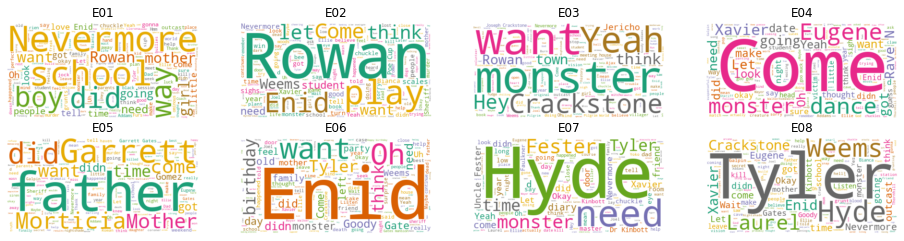

In [10]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

# full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
            #   'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']
ep = ['E01', 'E02', 'E03', 'E04', 'E05', 'E06', 'E07', 'E08']
# Create subplots for each episode
for index, episode in enumerate(data.columns):
    wc.generate(data_clean.transcript[episode])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(ep[index])
    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis

In [11]:
# Find the number of unique words that each episode uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for episode in data.columns:
    uniques = data[episode].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(ep, unique_list)), columns=['episode', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,episode,unique_words
5,E06,1090
7,E08,1111
3,E04,1186
6,E07,1208
1,E02,1257
4,E05,1282
2,E03,1316
0,E01,1533


In [12]:
# Calculate the words per minute of each episode

# Find the total number of words that a episode uses
total_list = []
for episode in data.columns:
    totals = sum(data[episode])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60]*8

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,episode,unique_words,total_words,run_times,words_per_minute
5,E06,1090,2113,60,35.216667
7,E08,1111,2129,60,35.483333
6,E07,1208,2206,60,36.766667
3,E04,1186,2234,60,37.233333
1,E02,1257,2347,60,39.116667
2,E03,1316,2387,60,39.783333
4,E05,1282,2460,60,41.000000
0,E01,1533,2873,60,47.883333


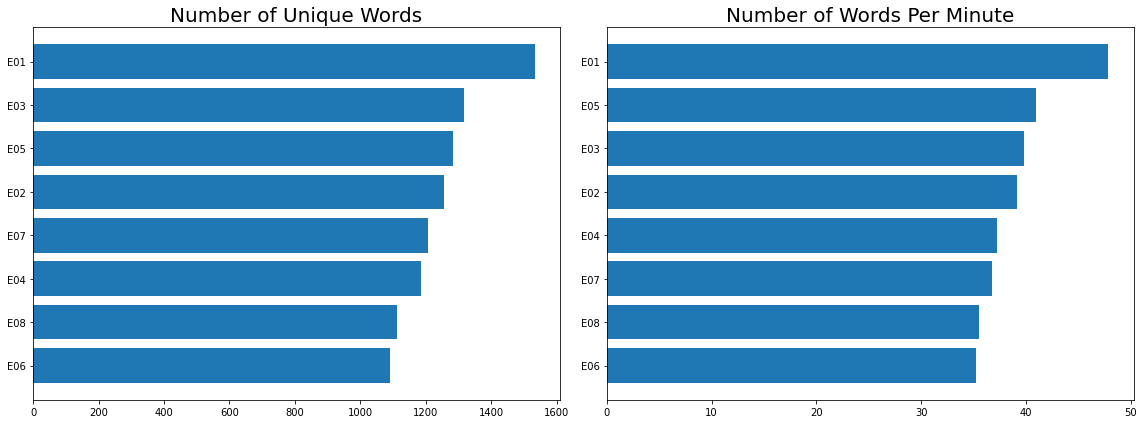

In [14]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.episode)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.episode)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * E01 and E03 have highest number of unique words
   * The difference between # words is not that much differentiable


* **Words Per Minute**
   * E01 and E05 have highest words per minutes
   * The speed of rest is mostly same.

### References made to some major characters during the 8 episodes of the show

### Analysis

In [15]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('wednesday', 8),
 ('music', 8),
 ('don', 8),
 ('know', 8),
 ('just', 8),
 ('playing', 7),
 ('ve', 7),
 ('like', 7),
 ('thing', 7),
 ('right', 7),
 ('ll', 7),
 ('nevermore', 6),
 ('want', 6),
 ('come', 6),
 ('did', 5),
 ('need', 5),
 ('enid', 5),
 ('let', 5),
 ('didn', 5),
 ('going', 4),
 ('oh', 4),
 ('got', 4),
 ('time', 4),
 ('weems', 4),
 ('think', 4),
 ('xavier', 4),
 ('monster', 4),
 ('rowan', 3),
 ('yeah', 3),
 ('okay', 3),
 ('gates', 3),
 ('tyler', 3),
 ('school', 2),
 ('way', 2),
 ('mother', 2),
 ('people', 2),
 ('tell', 2),
 ('girl', 2),
 ('sheriff', 2),
 ('crackstone', 2),
 ('old', 2),
 ('eugene', 2),
 ('family', 2),
 ('hyde', 2),
 ('laurel', 2),
 ('little', 1),
 ('love', 1),
 ('gonna', 1),
 ('plays', 1),
 ('cup', 1),
 ('bianca', 1),
 ('poe', 1),
 ('scales', 1),
 ('sighs', 1),
 ('good', 1),
 ('hey', 1),
 ('town', 1),
 ('pilgrim', 1),
 ('joseph', 1),
 ('jericho', 1),
 ('house', 1),
 ('meeting', 1),
 ('world', 1),
 ('believe', 1),
 ('dance', 1),
 ('goo', 1),
 ('rave', 1),
 ('t

In [16]:
# Let's isolate just these bad words
data_ch = data.transpose()[['rowan', 'enid', 'tyler', 'morticia', 'weems', 'laurel']]
# data_ch = pd.concat([data_ch_names.fucking, data_ch_names.fuck, data_ch_names.shit, ], axis=1)
# data_ch.columns = ['f_word', 's_word']
data_ch

,rowan,enid,tyler,morticia,weems,laurel
E01,14,9,6,3,4,0
E02,23,14,4,0,10,0
E03,10,5,1,0,9,0
E04,1,9,4,1,1,0
E05,7,3,1,15,4,0
E06,1,27,13,0,7,3
E07,3,2,12,0,3,10
E08,0,13,32,0,20,15


In [17]:
data_ch['rowan']

E01    14
E02    23
E03    10
E04     1
E05     7
E06     1
E07     3
E08     0
Name: rowan, dtype: int64

In [18]:
len(data_ch.columns)

6

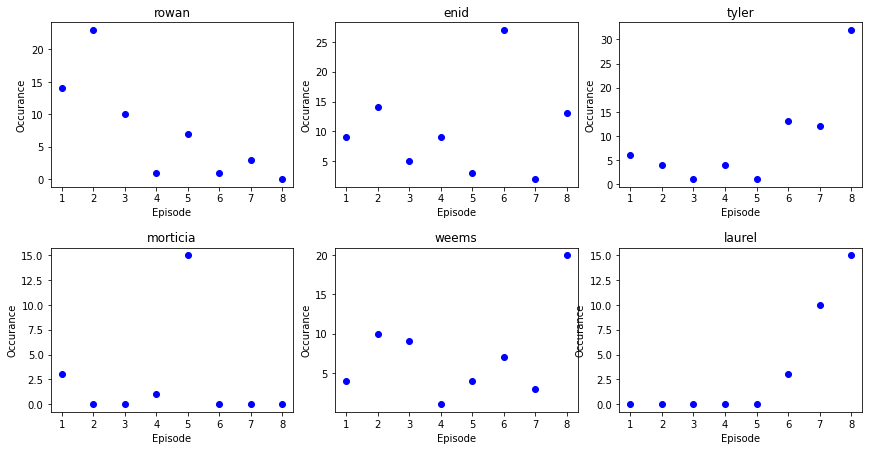

In [19]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [12, 6]
fig,ax = plt.subplots(2,3)
fig.tight_layout(h_pad=4)
for i, ch in enumerate(data_ch.columns):
    plt.subplot(2,3,i+1)
    x = np.arange(1,9,1)
    y = data_ch[ch]
    plt.scatter(x, y, color='blue')
    plt.xticks(x)
    plt.title(ch)
    plt.xlabel('Episode')
    plt.ylabel('Occurance')
    # plt.ylim()
    # plt.xlabel(ep)
    # plt.ylabel(data_ch.columns)
    # plt.text(x+1.5, y+0.5, ch[i], fontsize=10)
    # plt.xlim(-5, 155) 
    
# plt.title('Number of Bad Words Used in Routine', fontsize=20)
# plt.xlabel('Number of F Bombs', fontsize=15)
# plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* The reference to Rowan dropped as the story went forward and that of tyler and laurel went up which is in line according to the show as they were the culprits in the show.
* Weems and Enid remained fairly constant in the story.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**